In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('FullTrackInfo.csv')
df.shape

(105833, 23)

In [ ]:
df.head()

,id,song_name,artist_name,artist_id,preview_url,release_date,song_link,song_duration,song_popularity,playlist_id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6tNQ70jh4OwmPGpYy6R2o9,Beautiful Things,Benson Boone,22wbnEMDvgVIAGdFeek6ET,https://p.scdn.co/mp3-preview/e213f23e6fe59382...,2024-01-18,https://open.spotify.com/track/6tNQ70jh4OwmPGp...,180304,100,37i9dQZF1EQncLwOalG3K7,...,10.0,-5.692,1.0,0.0603,0.1510,0.000000,0.1400,0.219,105.029,3.0
1,51ZQ1vr10ffzbwIjDCwqm4,we can't be friends (wait for your love),Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR,NaN,2024-03-08,https://open.spotify.com/track/51ZQ1vr10ffzbwI...,228639,94,37i9dQZF1EQncLwOalG3K7,...,5.0,-8.305,1.0,0.0447,0.0657,0.000032,0.0751,0.287,115.830,4.0
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,45dkTj5sMRSjrmBSBeiHym,https://p.scdn.co/mp3-preview/ca7bdcb691fb64a5...,2023-09-15,https://open.spotify.com/track/3rUGC1vUpkDG9CZ...,131872,96,37i9dQZF1EQncLwOalG3K7,...,6.0,-3.180,0.0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1.0
3,1vvNmPOiUuyCbgWmtc6yfm,My Way,Calvin Harris,7CajNmpbOovFoOoasH2HaY,https://p.scdn.co/mp3-preview/ed8d125912048b01...,2016-09-16,https://open.spotify.com/track/1vvNmPOiUuyCbgW...,219159,79,37i9dQZF1EQncLwOalG3K7,...,4.0,-3.060,0.0,0.0426,0.0930,0.000037,0.1610,0.536,119.986,4.0
4,72jbDTw1piOOj770jWNeaG,Paris,The Chainsmokers,69GGBxA162lTqCwzJG5jLp,https://p.scdn.co/mp3-preview/2b043ab3ea679d2e...,2017-04-07,https://open.spotify.com/track/72jbDTw1piOOj77...,221506,75,37i9dQZF1EQncLwOalG3K7,...,2.0,-6.428,1.0,0.0304,0.0215,0.000002,0.0939,0.219,99.990,4.0


In [ ]:
# Features configuration
num_cols = ['song_duration', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
cat_cols = ['age']
text_features = ['song_name', 'artist_name']

In [ ]:
df.nunique()

id                  105833
song_name            82801
artist_name          24333
artist_id            24432
preview_url          63342
release_date          9083
song_link           105833
song_duration        53987
song_popularity         99
playlist_id            592
genre                   10
danceability          1225
energy                2260
key                     12
loudness             21552
mode                     2
speechiness           1635
acousticness          5354
instrumentalness      5385
liveness              1704
valence               1659
tempo                58889
time_signature           5
dtype: int64

In [ ]:
df.columns

Index(['id', 'song_name', 'artist_name', 'artist_id', 'preview_url',
       'release_date', 'song_link', 'song_duration', 'song_popularity',
       'playlist_id', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
# Drop the specified columns from the DataFrame
df = df.drop(columns=['preview_url', 'song_link', 'artist_id', 'playlist_id'])
df.head()

,id,song_name,artist_name,release_date,song_duration,song_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6tNQ70jh4OwmPGpYy6R2o9,Beautiful Things,Benson Boone,2024-01-18,180304,100,pop,0.472,0.471,10.0,-5.692,1.0,0.0603,0.1510,0.000000,0.1400,0.219,105.029,3.0
1,51ZQ1vr10ffzbwIjDCwqm4,we can't be friends (wait for your love),Ariana Grande,2024-03-08,228639,94,pop,0.645,0.663,5.0,-8.305,1.0,0.0447,0.0657,0.000032,0.0751,0.287,115.830,4.0
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,2023-09-15,131872,96,pop,0.750,0.733,6.0,-3.180,0.0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1.0
3,1vvNmPOiUuyCbgWmtc6yfm,My Way,Calvin Harris,2016-09-16,219159,79,pop,0.818,0.913,4.0,-3.060,0.0,0.0426,0.0930,0.000037,0.1610,0.536,119.986,4.0
4,72jbDTw1piOOj770jWNeaG,Paris,The Chainsmokers,2017-04-07,221506,75,pop,0.653,0.658,2.0,-6.428,1.0,0.0304,0.0215,0.000002,0.0939,0.219,99.990,4.0


# Remove nulls

In [ ]:
df.isna().sum()

id                   0
song_name           19
artist_name         17
release_date         0
song_duration        0
song_popularity      0
genre                0
danceability         5
energy               5
key                  5
loudness             5
mode                 5
speechiness          5
acousticness         5
instrumentalness     5
liveness             5
valence              5
tempo                5
time_signature       5
dtype: int64

In [ ]:
# Drop any rows that contain NaN values
df.dropna(axis=0, how='any', inplace=True)
df.shape

(105809, 19)

# Check for multi labels

In [ ]:
duplicated_all = df[df.duplicated(subset='id', keep=False)]
duplicated = df[df.duplicated(subset='id', keep='first')]

if not duplicated.empty:
    first_duplicate_id = duplicated['id'].iloc[0]
    print(df[df['id'] == first_duplicate_id])
else:
    print("No duplicates found excluding the first occurrence.")

No duplicates found excluding the first occurrence.


# Genres Distribution

In [ ]:
# Counting the occurrences of each category
df['genre'].value_counts()

rock         26484
metal        20557
hip hop      11777
blues         9834
r&b           8331
classical     7385
edm           6368
pop           5550
jazz          5322
country       4201
Name: genre, dtype: int64

In [ ]:
print(df['genre'].value_counts(normalize=True))

rock         0.250300
metal        0.194284
hip hop      0.111304
blues        0.092941
r&b          0.078736
classical    0.069796
edm          0.060184
pop          0.052453
jazz         0.050298
country      0.039704
Name: genre, dtype: float64


### We will use only the top 5 genres since the other ones are proportionally smaller in count compared to the top-5 genres

In [ ]:
top_genres = df['genre'].value_counts().nlargest(4).index
top_genres

Index(['rock', 'metal', 'hip hop', 'blues'], dtype='object')

In [ ]:
print(df[df['genre'].isin(top_genres)]['genre'].value_counts(normalize=True))
df = df[df['genre'].isin(top_genres)]

# Counting the occurrences of each category after removing other categories
df['genre'].value_counts()

rock       0.385772
metal      0.299438
hip hop    0.171546
blues      0.143244
Name: genre, dtype: float64


rock       26484
metal      20557
hip hop    11777
blues       9834
Name: genre, dtype: int64

# Check correlation to see if there are highly correlated columns to remove

/var/folders/88/0f5f1p916w74tt58_3fz2k7m0000gn/T/ipykernel_67706/4246597116.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,fmt='.1g',cmap= 'coolwarm',linewidths=1, linecolor='black')


<Axes: >

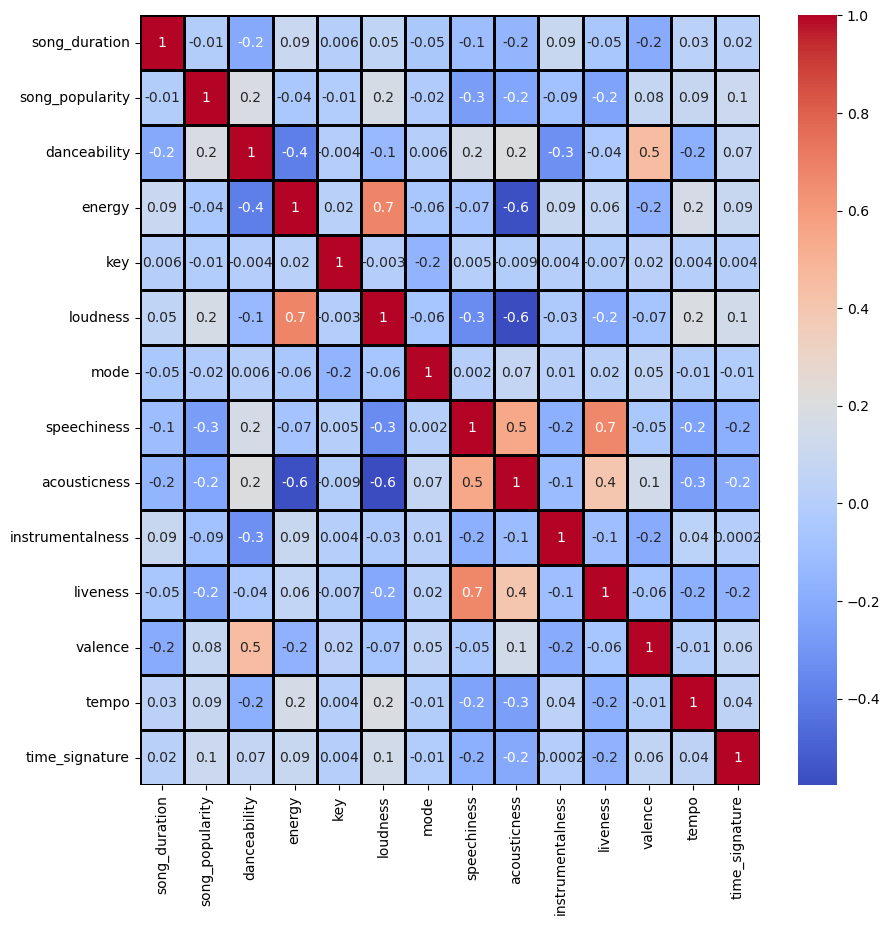

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,fmt='.1g',cmap= 'coolwarm',linewidths=1, linecolor='black')

# Check if data is normally distributed or has outliers

In [ ]:
df.describe()

,song_duration,song_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,6.865200e+04,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000,68652.000000
mean,2.320632e+05,25.680140,0.517463,0.730783,5.267334,-7.855799,0.636515,0.201526,0.239210,0.108141,0.270359,0.448106,120.915179,3.877979
std,9.256249e+04,22.714268,0.176630,0.219744,3.569666,4.009196,0.481006,0.268418,0.325377,0.248027,0.236154,0.236410,31.499786,0.494523
min,4.066000e+03,0.000000,0.000000,0.000020,0.000000,-41.298000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.780190e+05,2.000000,0.398000,0.582000,2.000000,-9.887000,0.000000,0.044100,0.000660,0.000000,0.105000,0.258000,95.100750,4.000000
50%,2.212000e+05,23.000000,0.515000,0.780000,5.000000,-6.892000,1.000000,0.080650,0.040300,0.000089,0.170000,0.432000,119.093500,4.000000
75%,2.702115e+05,44.000000,0.637000,0.924000,8.000000,-4.979000,1.000000,0.213000,0.444000,0.022500,0.345000,0.624250,142.241750,4.000000
max,2.965504e+06,96.000000,0.986000,1.000000,11.000000,5.388000,1.000000,0.969000,0.996000,0.999000,1.000000,0.989000,220.075000,5.000000


## Generate histograms to check the distribution

In [ ]:
import matplotlib.pyplot as plt

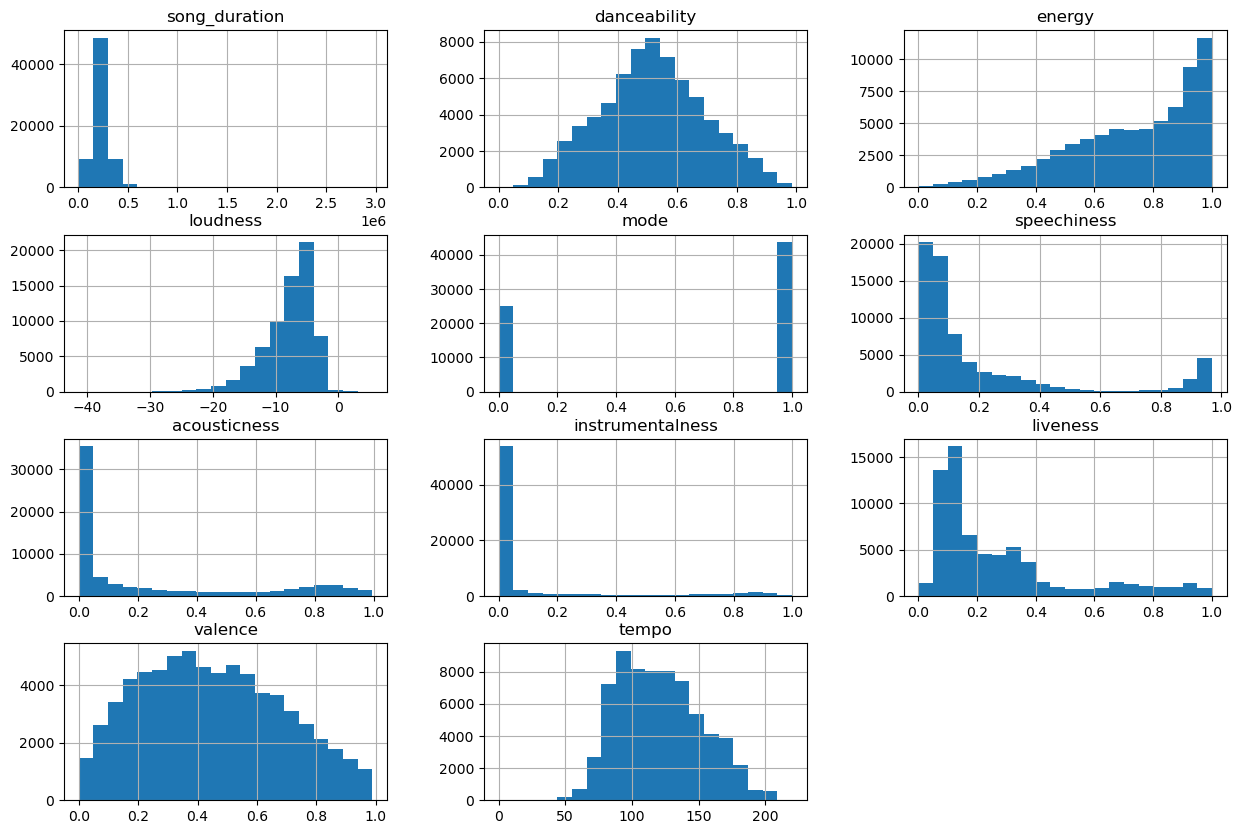

In [ ]:
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()

## Normalization and Transformations Required:

<li><b>Transformations:</b> Logarithmic transformations to 'song_duration', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', and 'liveness' to address skewness.
<li><b>Scaling:</b> Standard scaling to most features to standardize the range.
<li><b>Binary Features:</b> For features like 'mode', no transformation or scaling is necessary.

## Normalization and Transformations Required:

<li><b>Transformations:</b> Logarithmic transformations to 'loudness'to address skewness. The other columns have a smaller range, so addressing their skewness is not required.
<li><b>Scaling:</b> Standard scaling to most features to standardize the range.
<li><b>Binary Features:</b> For features like 'mode', no transformation or scaling is necessary.

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from scipy.stats import boxcox

# Handling negative values in loudness before log transformation
df['loudness'] = np.log1p(np.abs(df['loudness']))

# # Scaling
# # scaler = StandardScaler()
# scaler = MinMaxScaler()

# Features to scale
features_to_scale = ['song_duration', 'danceability', 'energy', 'loudness', 'tempo', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence']

# # Fit and transform the features
# df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Since 'mode' is binary, it does not need scaling or transformation
# Save the transformed and scaled data
# df.to_csv('transformed_and_scaled_data.csv', index=False)

scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])  # Apply scaling to the columns specified



## Check the distributions again

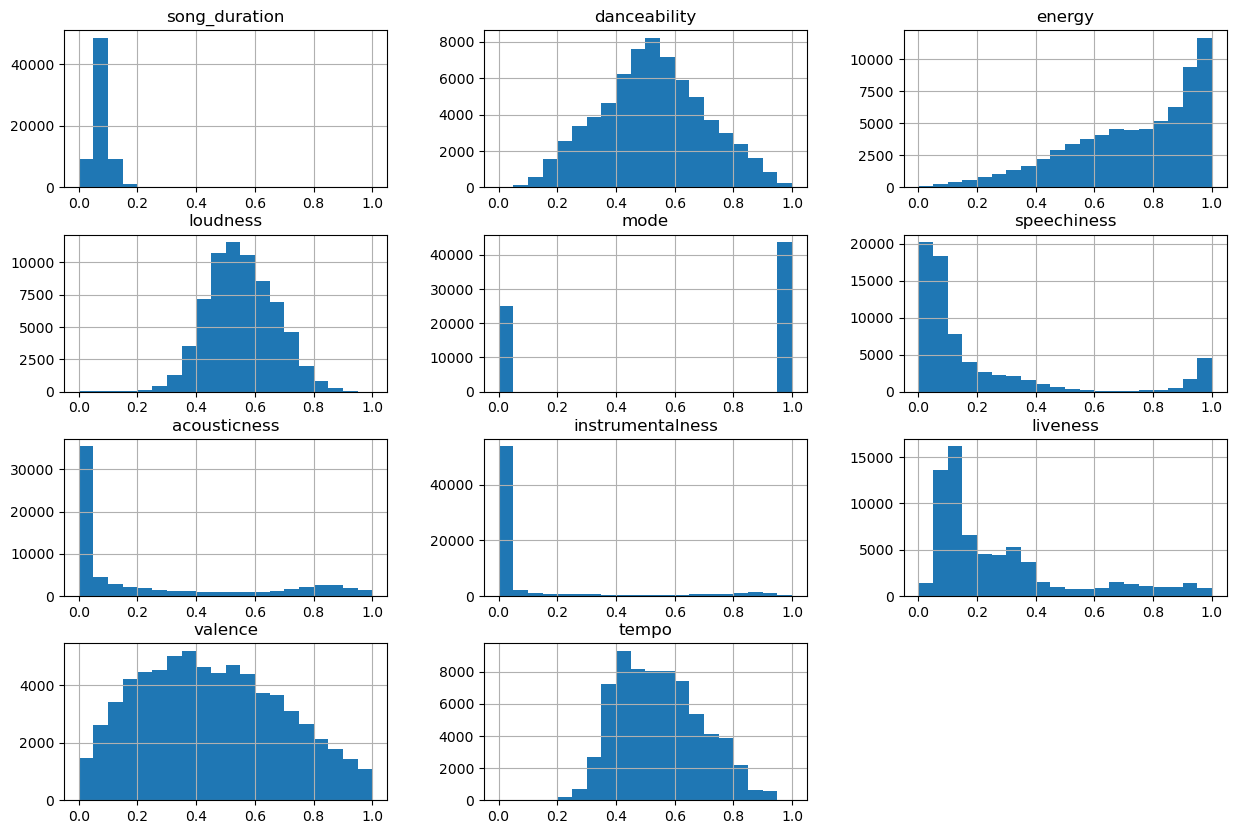

In [ ]:
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()

# Loudness has been normalized.
The other columns look like they're cat columns. so it's ok if they're not normalized?

Treating as Categorical:
If the data shows a strong clustering around certain values, it might make sense to treat these features as categorical (or ordinal, if a rank can be implied). For instance, 'acousticness' could be binned into categories like low, medium, and high.
Using Binning:
Transforming these features into bins can help in certain types of analysis, especially if the model benefits from non-linear separations. For example, converting 'energy' into 'low', 'medium', and 'high' can simplify the feature for some algorithms.

# Outliers Detection

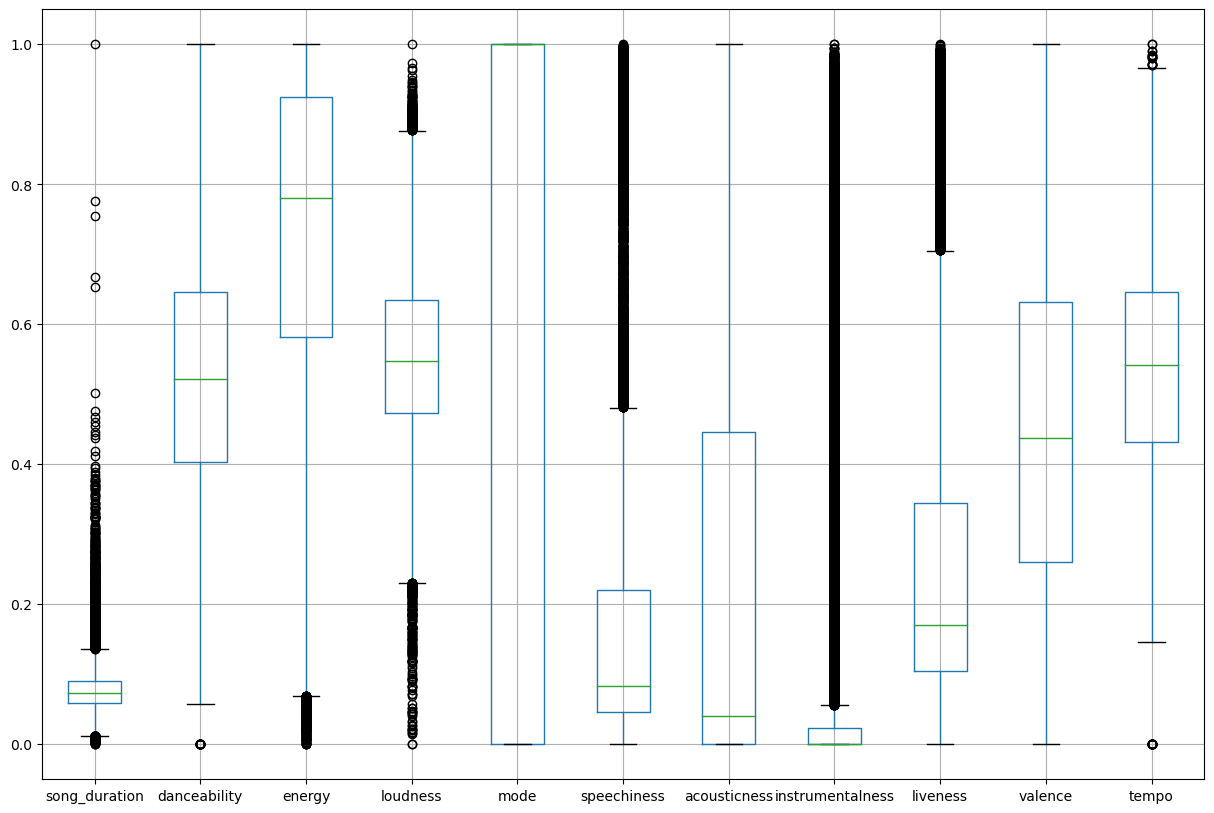

In [ ]:
df[num_cols].boxplot(figsize=(15, 10))
plt.show()

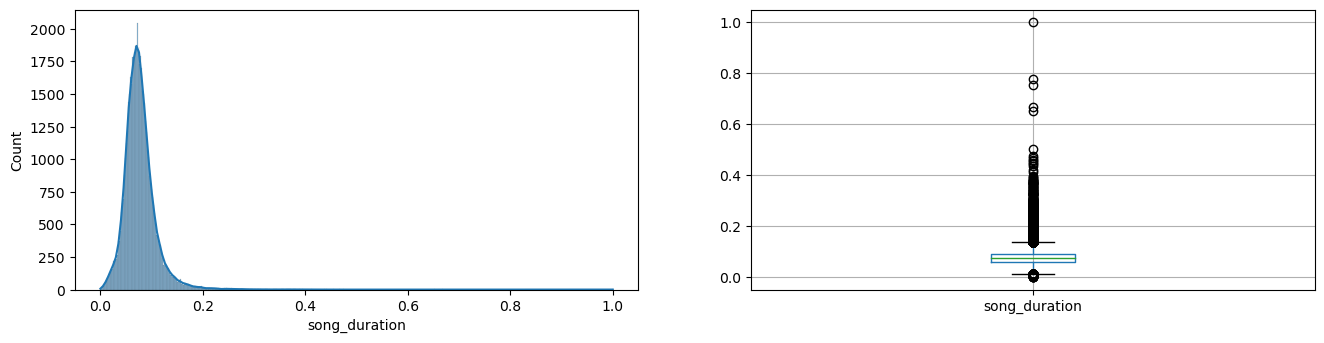

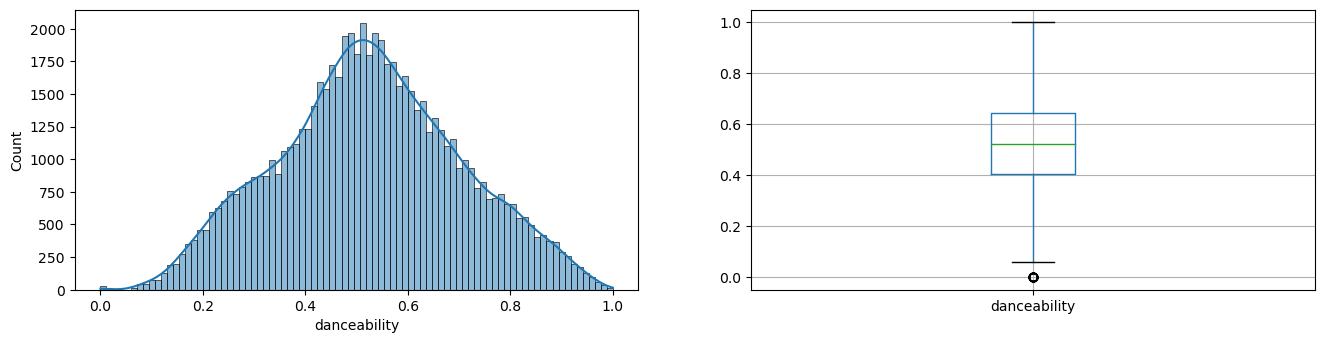

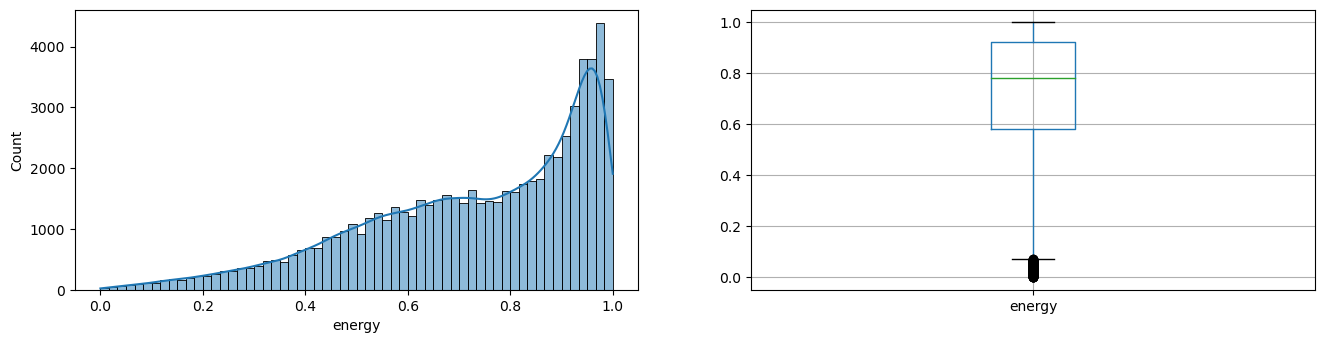

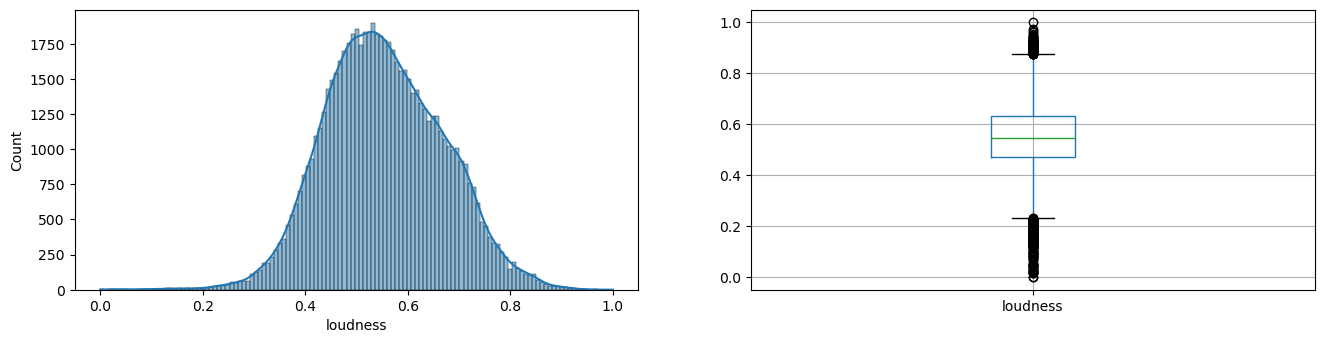

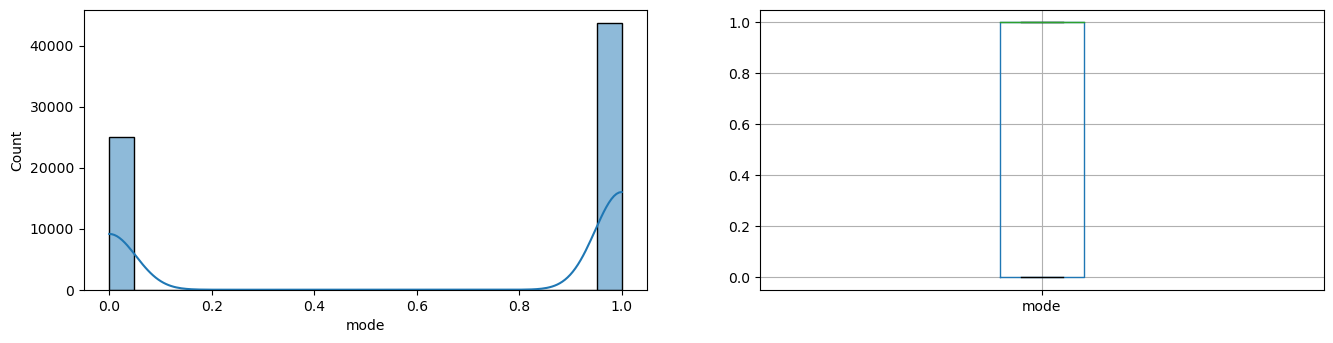

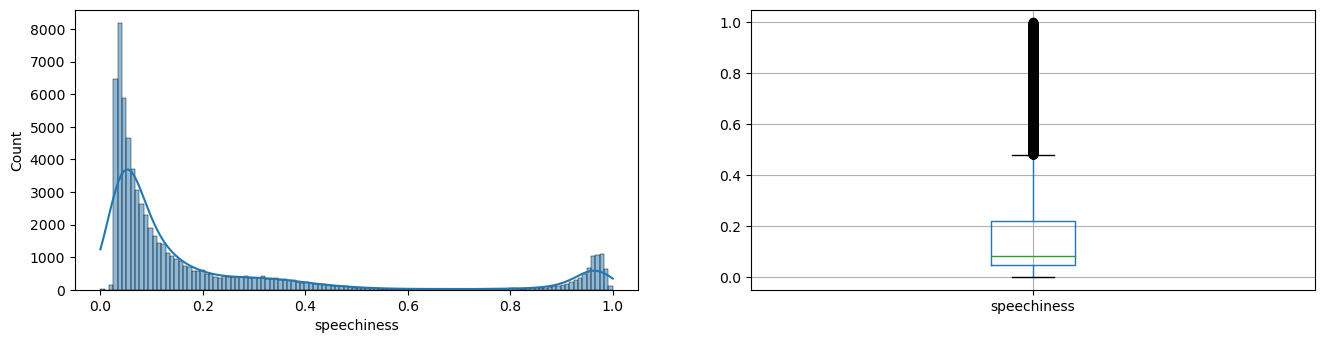

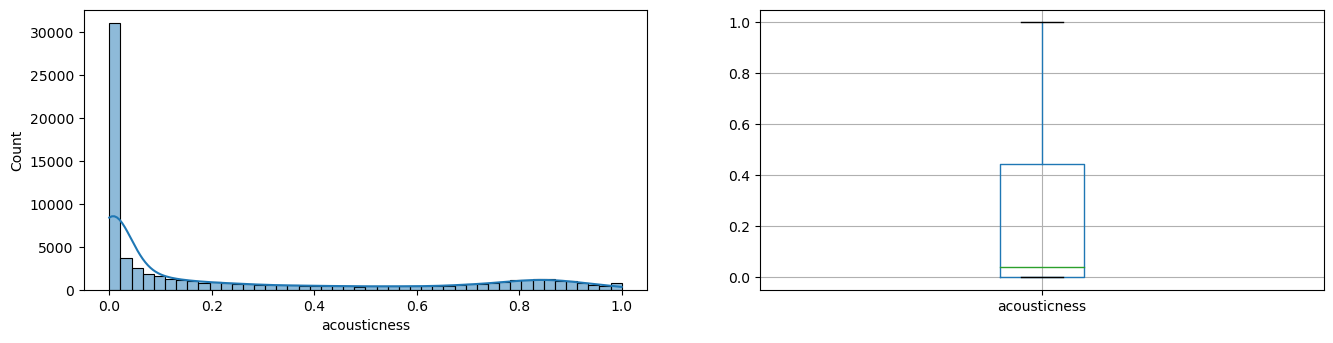

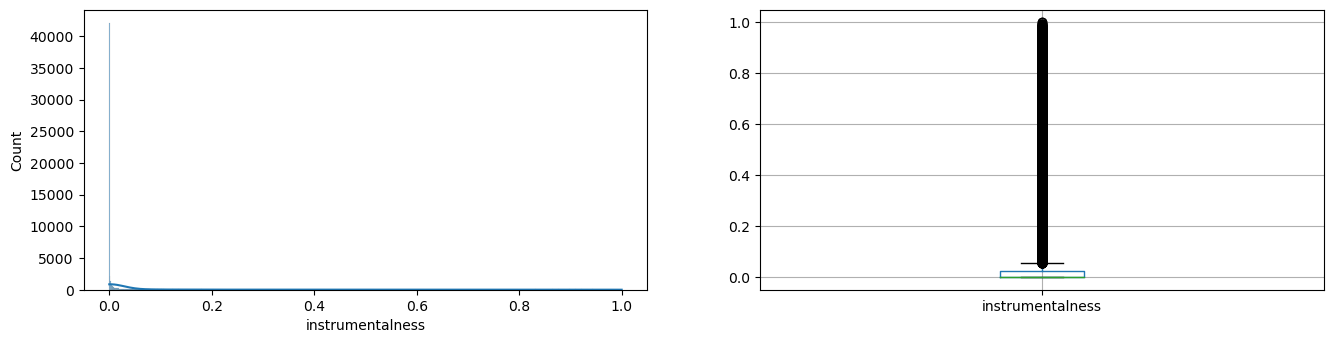

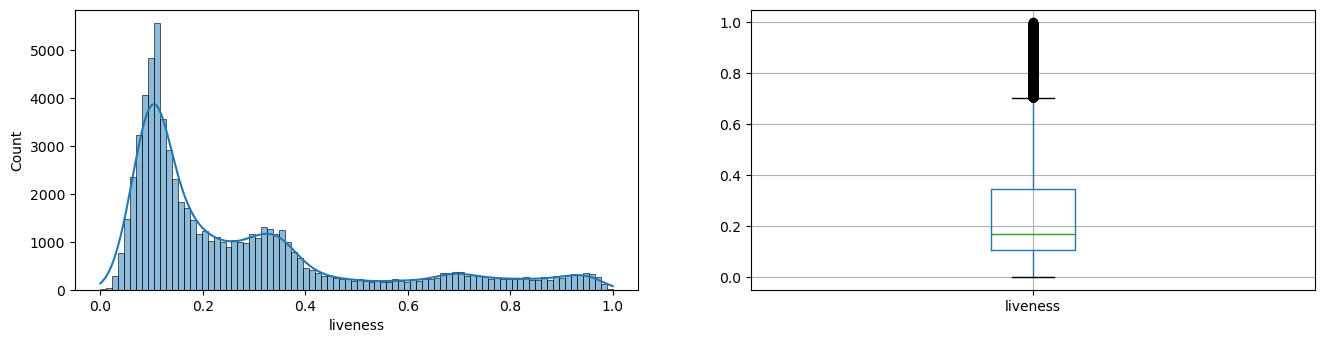

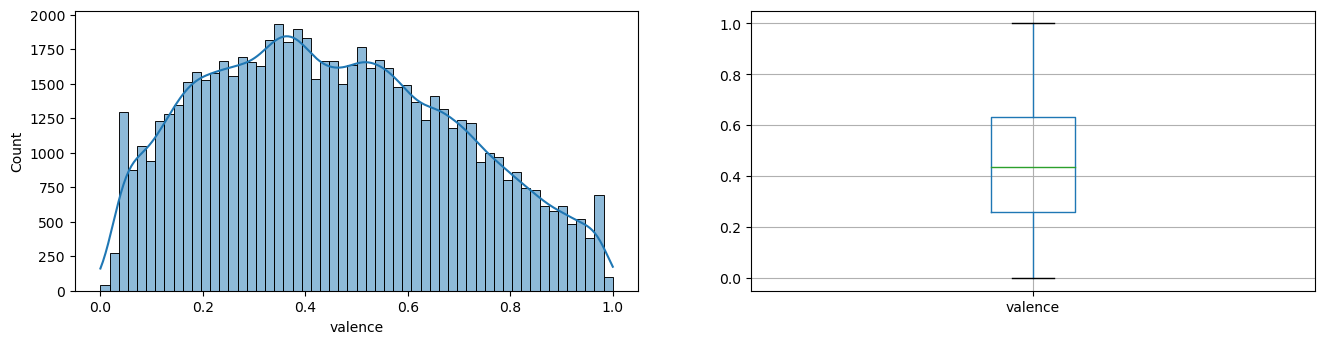

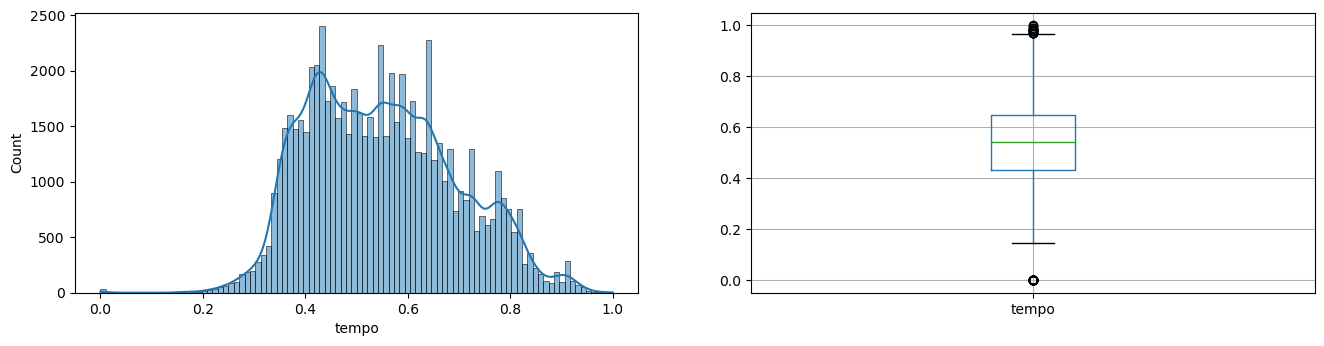

In [ ]:
for col in num_cols:

    plt.figure(figsize = (16,8))

    plt.subplot(2,2,1)
    sns.histplot(df[col], kde = True)

    plt.subplot(2,2,2)
    df.boxplot(column=[col])

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assuming your data is in df and you've already capped the outliers
  # Replace original columns with scaled data

# Now df has scaled data which is less sensitive to outliers


In [ ]:

# def handle_outliers(df, num_cols):
#     for col in num_cols:
#         if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
#             original_series = df[col].copy()  # Make a copy to avoid altering original df
#             lower_limit, upper_limit = get_outlier_thresholds(original_series)
#             # Calculate condition for non-outliers
#             condition = (original_series >= lower_limit) & (original_series <= upper_limit)
#             # Count outliers
#             outliers_count = np.sum(~condition)
#             print(f'Number of outliers in {col}: {outliers_count}')
#             # Remove outliers
#             df = df[condition]
#         else:
#             raise ValueError(f"Column {col} does not exist or is not numeric")
#     return df

# def get_outlier_thresholds(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     iqr = q3 - q1
#     threshold = 1.5
#     upper_limit = q3 + threshold * iqr
#     lower_limit = q1 - threshold * iqr
#     return lower_limit, upper_limit

def handle_outliers(df, num_cols):
    for col in num_cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            lower_limit, upper_limit = get_outlier_thresholds(df[col])
            # Cap outliers
            df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
            df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    return df

def get_outlier_thresholds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    upper_limit = q3 + threshold * iqr
    lower_limit = q1 - threshold * iqr
    return lower_limit, upper_limit


# Example usage:
outlier_cols = ['song_duration', 'danceability', 'energy', 'loudness', 'liveness', 'tempo']
print(f'Shape before removing outliers: {df.shape}')
df = handle_outliers(df, num_cols)  # Assuming 'df' is your DataFrame and 'num_cols' contains the names of numeric columns
print(f'Shape after removing outliers: {df.shape}')


Shape before removing outliers: (68652, 19)
Shape after removing outliers: (68652, 19)


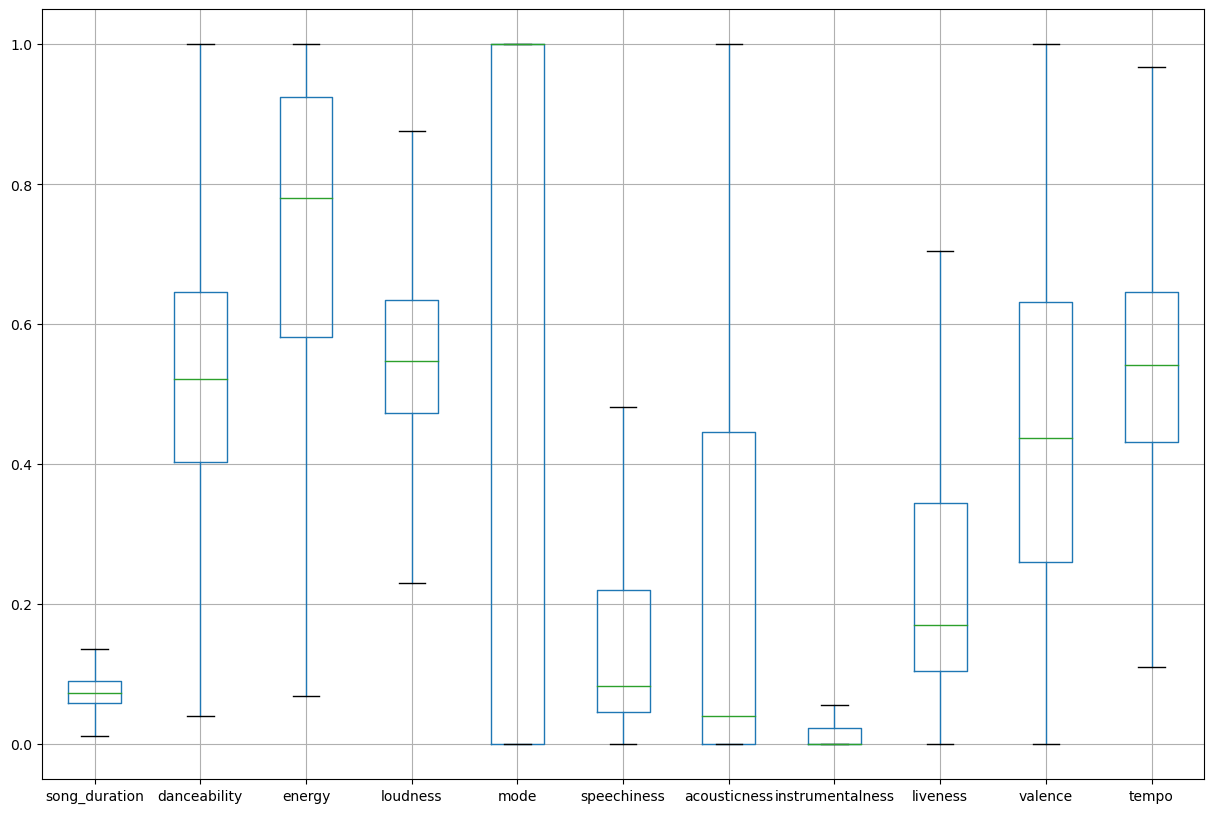

In [ ]:
df[num_cols].boxplot(figsize=(15, 10))
plt.show()

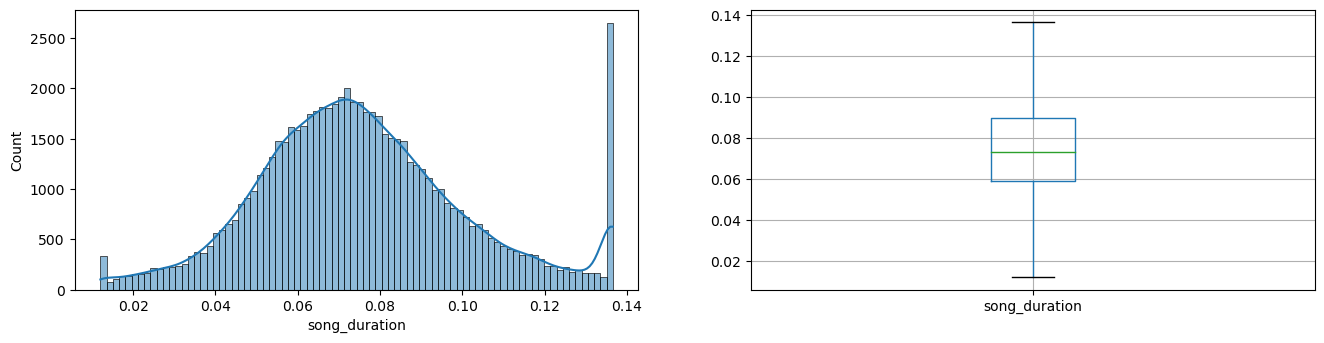

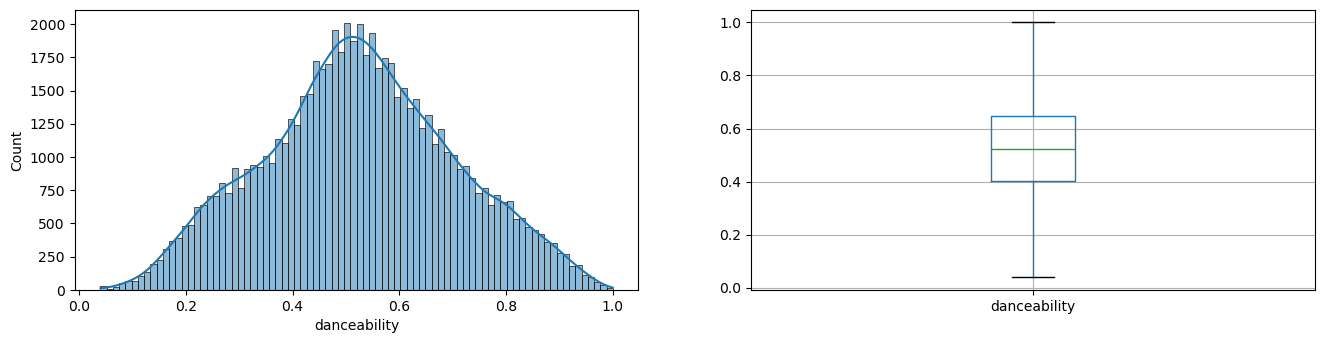

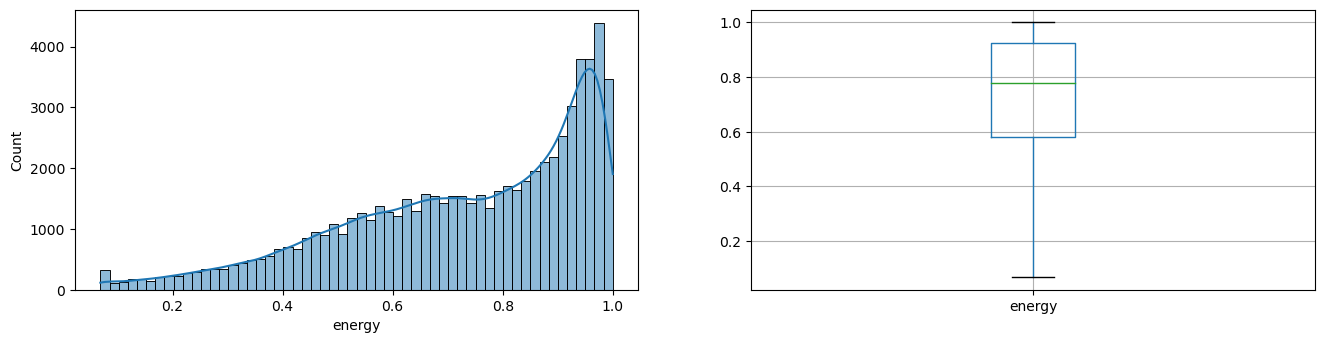

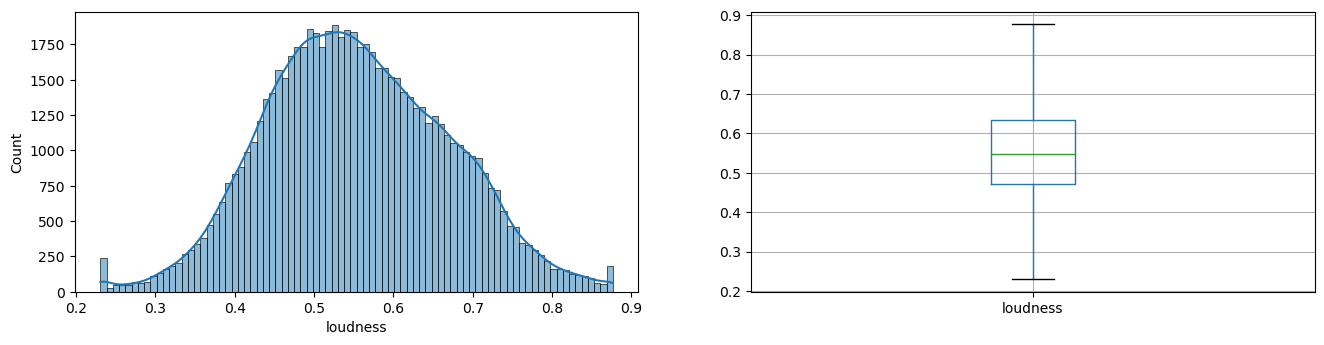

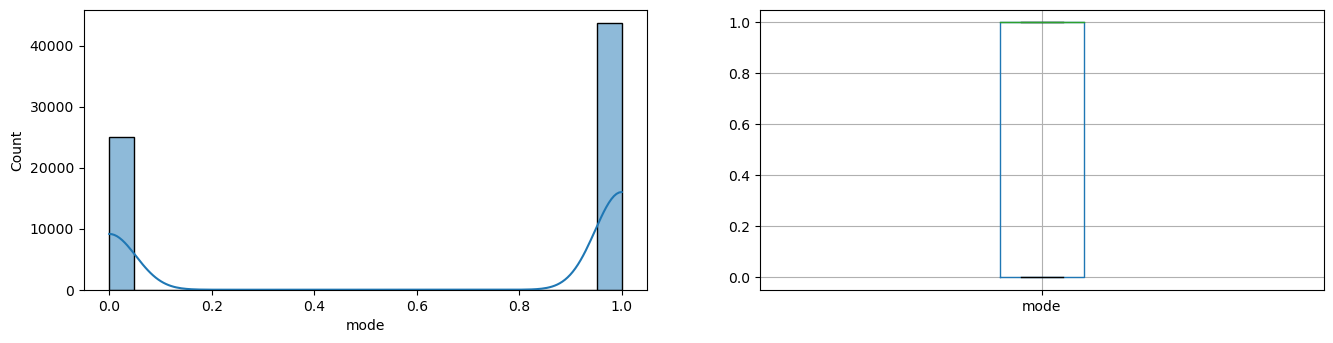

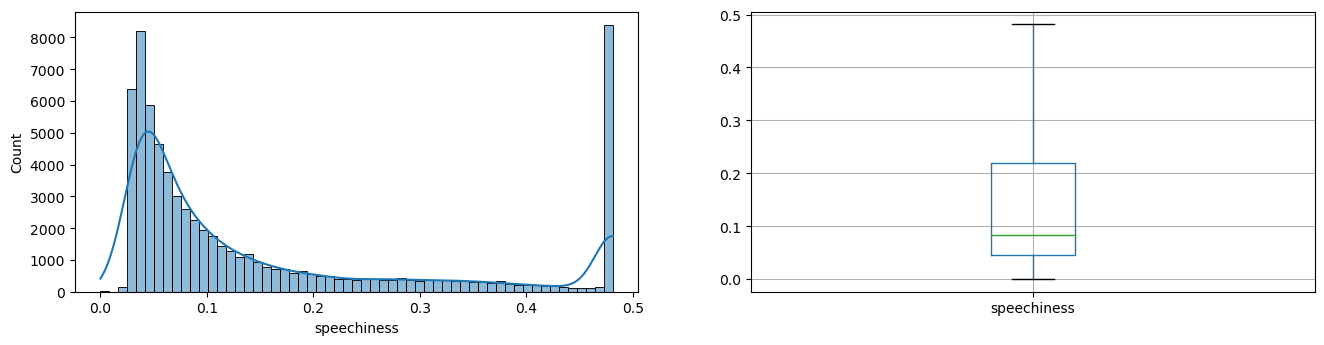

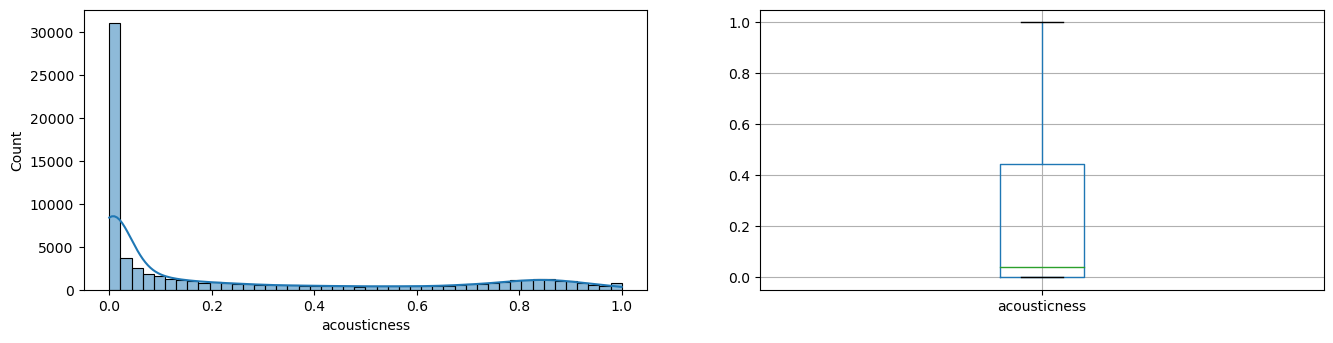

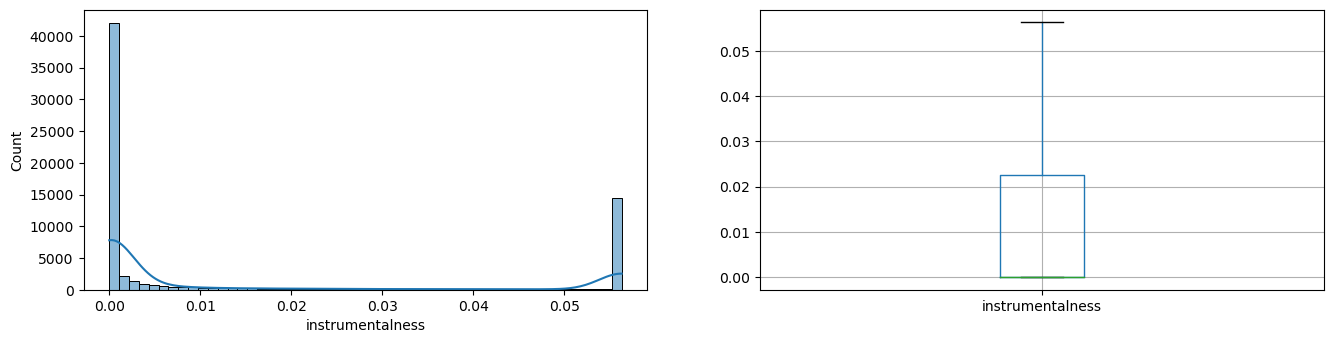

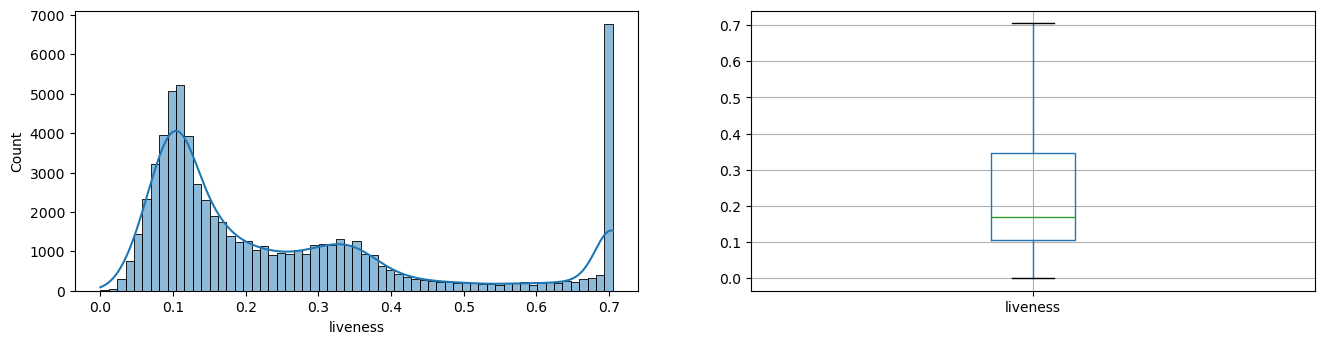

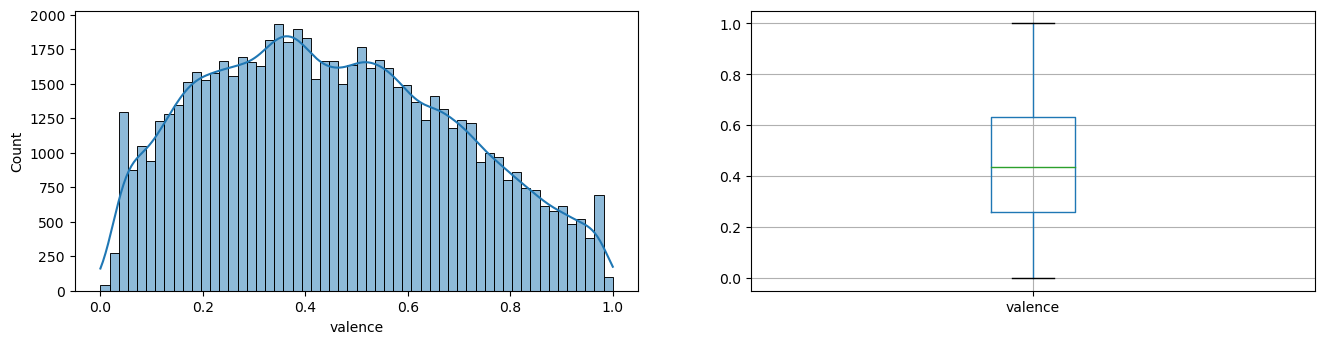

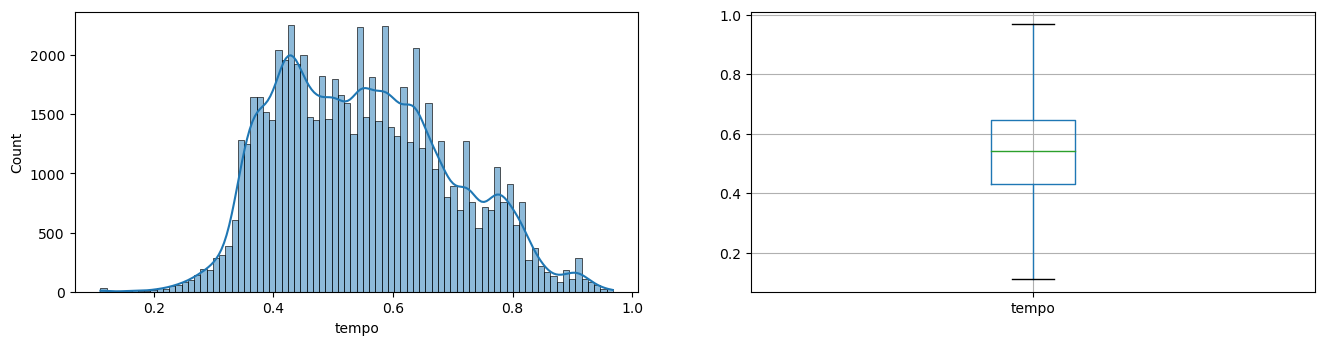

In [ ]:
skew_data = {}
for col in num_cols:

    plt.figure(figsize = (16,8))

    plt.subplot(2,2,1)
    sns.histplot(df[col], kde = True)

    plt.subplot(2,2,2)
    df.boxplot(column=[col])


    skew_data[col] = df[col].skew()

In [ ]:
for data in skew_data:
    if(skew_data[data]>1):
        print(data, skew_data[data])

speechiness 1.2021778216842465
acousticness 1.0859600963433709
instrumentalness 1.1759799752272835
liveness 1.1489767160702526


# Genres Distribution

In [ ]:
# Counting the occurrences of each category
df['genre'].value_counts()

rock       26484
metal      20557
hip hop    11777
blues       9834
Name: genre, dtype: int64

# Preprocessing Data

In [ ]:
# Define preprocessing for numeric and categorical features
def preprocess_features(data_frame):
    data_frame = data_frame.copy()
    data_frame['song_duration'] = data_frame['song_duration'] / 60000  # Convert milliseconds to minutes
    data_frame['release_date'] = pd.to_datetime(data_frame['release_date'], errors='coerce')
    data_frame['year'] = data_frame['release_date'].dt.year
    data_frame['age'] = 2024 - data_frame['year']
    data_frame['age'].fillna(0, inplace=True)
    data_frame.drop(columns=['release_date', 'year'], inplace=True)
    return data_frame

df = preprocess_features(df)
print("Shape of Data after Preprocessing:", df.shape)
df.head()

Shape of Data after Preprocessing: (68652, 19)


,id,song_name,artist_name,song_duration,song_popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,age
5552,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,Creedence Clearwater Revival,8.783289e-07,88,rock,0.751521,0.696994,0.0,0.552232,1.0,0.028586,0.066667,0.000023,0.1330,0.782609,0.527588,4.0,54
5553,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,1.606579e-06,87,rock,0.319473,0.714994,11.0,0.585174,0.0,0.037358,0.001255,0.000008,0.0942,0.502528,0.708508,3.0,26
5554,0u6JFVn0KHHlidZxNL9gVE,La Grange (2005 Remaster),ZZ Top,1.274235e-06,76,rock,0.516227,0.640993,4.0,0.635525,0.0,0.272446,0.002500,0.030430,0.1960,0.618807,0.734931,4.0,51
5555,1PXsUXSM3LF2XNSkmIldPb,Little Black Submarines,The Black Keys,1.391216e-06,70,rock,0.370183,0.465989,2.0,0.568069,1.0,0.043137,0.161647,0.000007,0.1060,0.492417,0.432412,4.0,13
5556,2oaK4JLVnmRGIO9ytBE1bt,Dark Necessities,Red Hot Chili Peppers,1.676742e-06,73,rock,0.709939,0.741995,5.0,0.543673,0.0,0.073891,0.072490,0.019920,0.1100,0.199191,0.417853,4.0,8


In [ ]:
# Define target and features
X = df.drop(columns=['genre'])
y = df['genre']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# # Transformers and ColumnTransformer
# numeric_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
text_transformer = TfidfVectorizer()

column_transformer = ColumnTransformer([
#     ("scaler", numeric_transformer, num_cols),
    ("ordinal", categorical_transformer, cat_cols),
    ("txt_song", text_transformer, 'song_name'),
    ("txt_artist", text_transformer, 'artist_name')
], remainder='drop')

# Modelling

# Random Forest

## Baseline

In [ ]:
rf_baseline = Pipeline([
    ('preprocessing', column_transformer),
    ('classifier', RandomForestClassifier())
])

# Fit Random Forest baseline model
rf_baseline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['age']),
                                                 ('txt_song', TfidfVectorizer(),
                                                  'song_name'),
                                                 ('txt_artist',
                                                  TfidfVectorizer(),
                                                  'artist_name')])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predict and evaluate Random Forest baseline model
print('-------------------------------------')
print('Random Forest Baseline Evaluation:')
print('-------------------------------------')
rf_predictions = rf_baseline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, rf_predictions))
print('-------------------------------------')
print('Classification Report:')
print('-------------------------------------')
print(classification_report(y_val, rf_predictions))

-------------------------------------
Random Forest Baseline Evaluation:
-------------------------------------
Accuracy: 0.7898033503277494
-------------------------------------
Classification Report:
-------------------------------------
              precision    recall  f1-score   support

       blues       0.91      0.64      0.75       984
     hip hop       0.79      0.73      0.76      1177
       metal       0.72      0.88      0.79      2056
        rock       0.83      0.80      0.81      2648

    accuracy                           0.79      6865
   macro avg       0.81      0.76      0.78      6865
weighted avg       0.80      0.79      0.79      6865



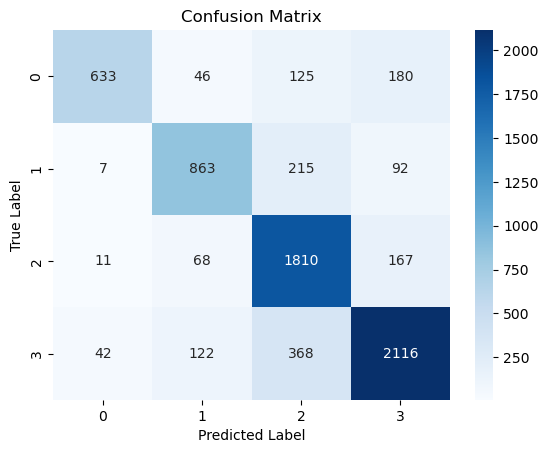

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, rf_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hyperparameter Tuning

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# Grid Search
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10]
#     'classifier__max_features': ['auto', 'sqrt', 'log2']
}

rf_pipeline = Pipeline([
    ('preprocessing', column_transformer),
#     ('svd', TruncatedSVD()),
    ('classifier', RandomForestClassifier())
])

# Fit and evaluate model with text features
rf_words_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
rf_words_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/shreenithi/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['age']),
                                                                        ('txt_song',
                                                                         TfidfVectorizer(),
                                                                         'song_name'),
                                                                        ('txt_artist',
                                                                         TfidfVectorizer(),
                                                                         'artist_name')])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, None],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [ ]:
print('-------------------------------------')
print('Random Forest Evaluation:')
print('-------------------------------------')
print("Model Best Parameters:", rf_words_grid_search.best_params_)
print('-------------------------------------')
print("Model Best Score:", rf_words_grid_search.best_score_)
print('-------------------------------------')
rf_y_val_pred = rf_words_grid_search.predict(X_val)
print("Classification Report:")
print('-------------------------------------')
print(classification_report(y_val, rf_y_val_pred))

-------------------------------------
Random Forest Evaluation:
-------------------------------------
Model Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400}
-------------------------------------
Model Best Score: 0.7816863822447415
-------------------------------------
Classification Report:
-------------------------------------
              precision    recall  f1-score   support

       blues       0.92      0.64      0.75       984
     hip hop       0.79      0.74      0.76      1177
       metal       0.72      0.88      0.79      2056
        rock       0.83      0.80      0.81      2648

    accuracy                           0.79      6865
   macro avg       0.81      0.77      0.78      6865
weighted avg       0.80      0.79      0.79      6865



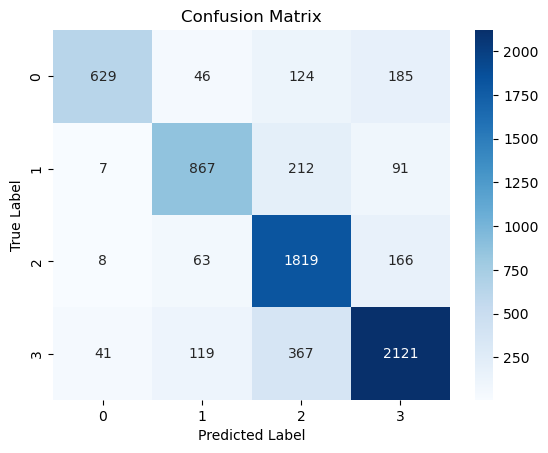

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, rf_y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Test Dataset Prediction + Evaluation

In [ ]:
rf_y_test_pred = rf_words_grid_search.predict(X_test)

In [ ]:
print('-------------------------------------')
print('Random Forest Test Evaluation:')
print('-------------------------------------')
print("Accuracy:", accuracy_score(y_test, rf_y_test_pred))
print('-------------------------------------')
print('Classification Report:')
print('-------------------------------------')
print(classification_report(y_test, rf_y_test_pred))

-------------------------------------
Random Forest Test Evaluation:
-------------------------------------
Accuracy: 0.796533644043111
-------------------------------------
Classification Report:
-------------------------------------
              precision    recall  f1-score   support

       blues       0.91      0.67      0.77       983
     hip hop       0.78      0.75      0.77      1178
       metal       0.74      0.87      0.80      2056
        rock       0.83      0.81      0.82      2649

    accuracy                           0.80      6866
   macro avg       0.81      0.77      0.79      6866
weighted avg       0.80      0.80      0.80      6866

